In [2]:
#!pip install openeo
#!pip install rasterio

In [2]:

import rasterio
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
import openeo

Conectarse al API usando los datos de usuario y contraseña

In [3]:
connection = openeo.connect("https://openeo.dataspace.copernicus.eu").authenticate_oidc()

Authenticated using refresh token.


In [30]:
#Areas de interes
lago_atitlan = {
    "west": -91.349,
    "east": -91.0702,
    "south": 14.5971,
    "north": 14.7648
}
lago_amatitlan = {
    "west": -90.66,
    "east": -90.58,
    "south": 14.43,
    "north": 14.51
}

Cargando las coordeanadas de Guatemala

In [58]:
atitlan_cube = connection.load_collection(
    "SENTINEL2_L2A",
    spatial_extent=lago_atitlan,  # Región de Guatemala
    temporal_extent=["2025-04-15", "2025-04-16"],  # Usa fechas pasadas, no futuras
    bands=["B02","B03","B04", "B08"]#,
    #max_cloud_cover=90
)

In [59]:
connection

<Connection to 'https://openeo.dataspace.copernicus.eu/openeo/1.2/' with OidcBearerAuth>

Descargar la imagen

In [60]:
result_graph = atitlan_cube.save_result(format="GTIFF")
job = connection.create_job(result_graph)
job.start_and_wait()
job.download_results("imgs2/Bandas_Atitlan.tiff")

0:00:00 Job 'j-25081119310440d1b3e962904a25edf4': send 'start'
0:00:14 Job 'j-25081119310440d1b3e962904a25edf4': created (progress 0%)
0:00:20 Job 'j-25081119310440d1b3e962904a25edf4': created (progress 0%)
0:00:26 Job 'j-25081119310440d1b3e962904a25edf4': created (progress 0%)
0:00:34 Job 'j-25081119310440d1b3e962904a25edf4': created (progress 0%)
0:00:45 Job 'j-25081119310440d1b3e962904a25edf4': created (progress 0%)
0:00:58 Job 'j-25081119310440d1b3e962904a25edf4': created (progress 0%)
0:01:13 Job 'j-25081119310440d1b3e962904a25edf4': running (progress N/A)
0:01:32 Job 'j-25081119310440d1b3e962904a25edf4': running (progress N/A)
0:01:57 Job 'j-25081119310440d1b3e962904a25edf4': running (progress N/A)
0:02:27 Job 'j-25081119310440d1b3e962904a25edf4': running (progress N/A)
0:03:04 Job 'j-25081119310440d1b3e962904a25edf4': running (progress N/A)
0:03:51 Job 'j-25081119310440d1b3e962904a25edf4': finished (progress 100%)


/var/folders/9q/tfydcr6d56x3ht8bfg6vfx240000gn/T/ipykernel_7336/419621888.py:4: UserDeprecationWarning: Call to deprecated method download_results. (Instead use `BatchJob.get_results` and the more flexible download functionality of `JobResults`) -- Deprecated since version 0.4.10.
  job.download_results("imgs2/Bandas_Atitlan.tiff")


{PosixPath('imgs2/Bandas_Atitlan.tiff'): {'bands': [{'eo:center_wavelength': 0.4924,
    'eo:common_name': 'blue',
    'name': 'B02'},
   {'eo:center_wavelength': 0.5598, 'eo:common_name': 'green', 'name': 'B03'},
   {'eo:center_wavelength': 0.6646, 'eo:common_name': 'red', 'name': 'B04'},
   {'eo:center_wavelength': 0.8328, 'eo:common_name': 'nir', 'name': 'B08'}],
  'eo:bands': [{'center_wavelength': 0.4924,
    'common_name': 'blue',
    'name': 'B02'},
   {'center_wavelength': 0.5598, 'common_name': 'green', 'name': 'B03'},
   {'center_wavelength': 0.6646, 'common_name': 'red', 'name': 'B04'},
   {'center_wavelength': 0.8328, 'common_name': 'nir', 'name': 'B08'}],
  'href': 'https://openeo.dataspace.copernicus.eu/openeo/1.2/jobs/j-25081119310440d1b3e962904a25edf4/results/assets/Nzg1YTQ3ODktMThmNy00NjQwLWFlNjItMGIwY2E4NjhiMmFk/60c5863d042922fbda494e6629f607df/openEO_2025-04-15Z.tif?expires=1755545697',
  'proj:bbox': [677700, 1614410, 707890, 1633210],
  'proj:epsg': 32615,
  'proj:

Visualizar lo descargado

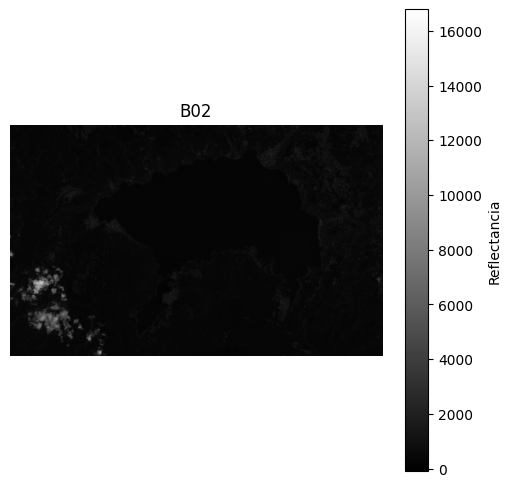

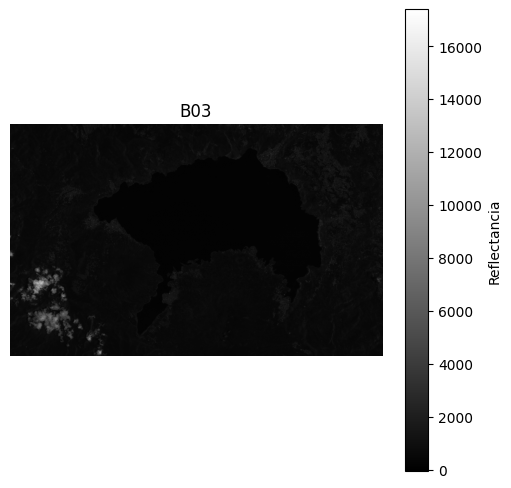

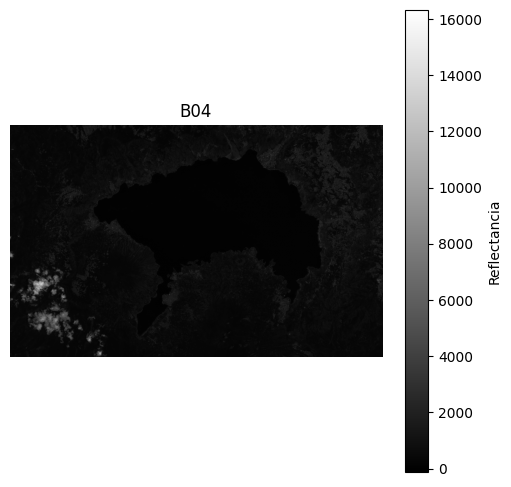

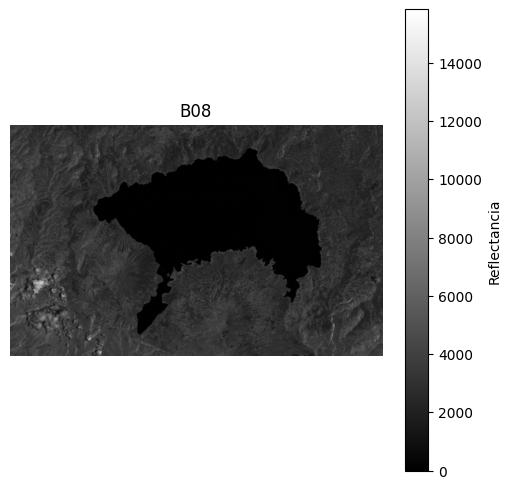

In [61]:
ruta_tif = "imgs2/Bandas_Atitlan.tiff"

with rasterio.open(ruta_tif) as src:
    bandas = src.read()  # Lee todas las bandas
    nombres = src.descriptions if src.descriptions[0] else [f"Banda {i+1}" for i in range(src.count)]
    nodata = src.nodata

# Visualizar bandas individuales
for i in range(bandas.shape[0]):
    plt.figure(figsize=(6, 6))
    img = bandas[i]
    img = np.ma.masked_where(img == nodata, img)
    plt.imshow(img, cmap='gray')
    plt.title(f"{nombres[i]}")
    plt.axis('off')
    plt.colorbar(label="Reflectancia")
    plt.show()

In [62]:
nodata,nombres, bandas

(-32768.0,
 ('B02', 'B03', 'B04', 'B08'),
 array([[[ 370,  377,  366, ...,  950,  932,  936],
         [ 424,  348,  345, ...,  940,  992,  936],
         [ 400,  357,  351, ...,  918,  974,  874],
         ...,
         [ 435,  457,  405, ...,  389,  386,  397],
         [ 425,  450,  412, ...,  381,  394,  385],
         [ 409,  421,  429, ...,  367,  335,  428]],
 
        [[ 686,  675,  690, ..., 1328, 1334, 1328],
         [ 672,  616,  655, ..., 1322, 1384, 1358],
         [ 684,  652,  653, ..., 1344, 1370, 1296],
         ...,
         [ 714,  730,  617, ...,  636,  711,  734],
         [ 714,  726,  608, ...,  656,  728,  694],
         [ 648,  651,  670, ...,  702,  580,  676]],
 
        [[ 455,  426,  400, ..., 1870, 1840, 1816],
         [ 534,  433,  393, ..., 1866, 1898, 1836],
         [ 516,  418,  414, ..., 1882, 1914, 1814],
         ...,
         [ 444,  449,  398, ...,  378,  390,  393],
         [ 462,  474,  395, ...,  377,  389,  376],
         [ 447,  454,  469

Mostrar en falso color

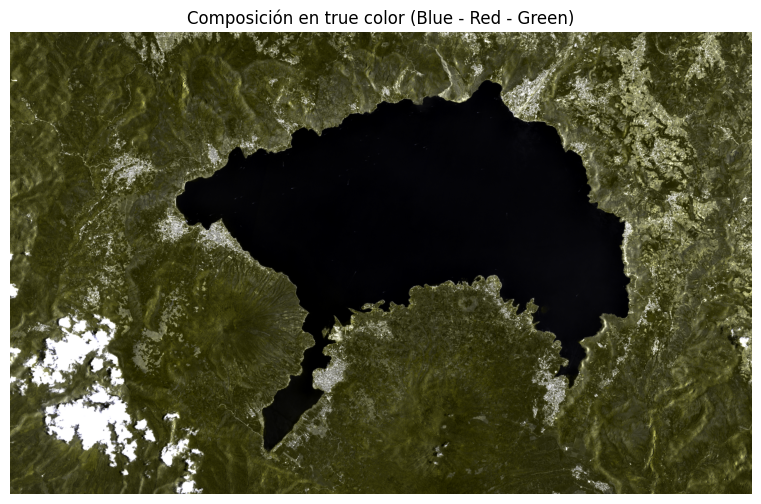

In [63]:
# Normalizador
def normalize(b):
    b_min, b_max = np.percentile(b[b > 0], (2, 98))
    return np.clip((b - b_min) / (b_max - b_min), 0, 1)

blue = bandas[0]   #B02
green = bandas[1]  # B03
red = bandas[1]    # B04
nir = bandas[2]    # B08

# Reasignar correctamente:
b = normalize(blue)  # B02
g = normalize(green)    # B03
r = normalize(red)    # B04
n = normalize(blue)    # B08

# Falso color (NIR NearInfrared, Red, Green)
rgb = np.dstack([r, g, b])

plt.figure(figsize=(10, 6))
plt.imshow(rgb)
plt.title("Composición en true color (Blue - Red - Green)")
plt.axis('off')
plt.show()


## NDVI

Calcule el índice de diferencia normalizada para el lago de Atitlán. Recuerde que usando Sentinel-2 se calcula usando las siguiente fórmula:<br>

NDVI (Sentinel 2) = (B8 – B4) / (B8 + B4)

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# Convertir a float32 y escalar a reflectancia (0–1)
red_scale = red.astype(np.float32) / 10000  # B04
nir_scale = nir.astype(np.float32) / 10000  # B08
green_scale = green.astype(np.float32) / 10000  # B03
blue_scale = blue.astype(np.float32) / 10000  # B02

# Calcular NDVI
ndvi_atitlan = np.where(
    (nir_scale + red_scale) == 0,
    0,
    (nir_scale - red_scale) / (nir_scale + red_scale)
)

ndvi_atitlan


array([[-0.202454  , -0.22615807, -0.26605505, ...,  0.16948093,
         0.15942033,  0.15521629],
       [-0.11442785, -0.17445186, -0.25      , ...,  0.17063989,
         0.1566118 ,  0.14965557],
       [-0.14      , -0.2186916 , -0.22399251, ...,  0.16677   ,
         0.16565168,  0.16655949],
       ...,
       [-0.23316064, -0.23833756, -0.21576355, ..., -0.2544379 ,
        -0.29155308, -0.3025732 ],
       [-0.21428573, -0.20999998, -0.2123629 , ..., -0.2700871 ,
        -0.30349153, -0.29719627],
       [-0.18356164, -0.17828053, -0.1764706 , ..., -0.3097015 ,
        -0.27753302, -0.24953786]], dtype=float32)

### Visualizar NDVI

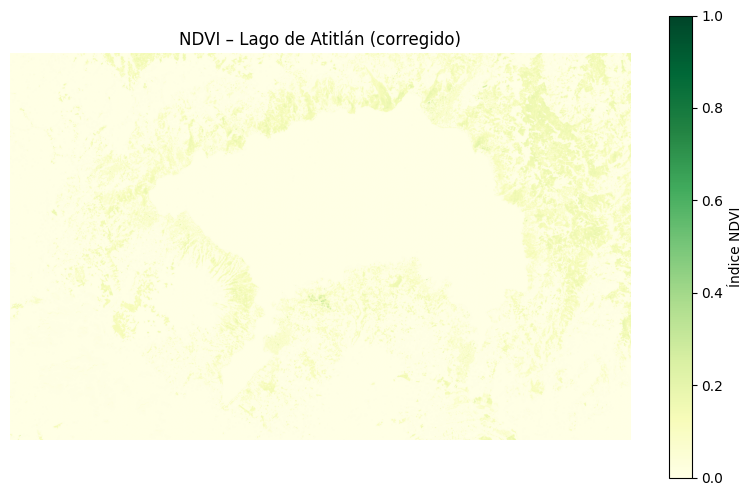

In [65]:
# Mostrar NDVI
plt.figure(figsize=(10, 6))
plt.imshow(ndvi_atitlan, cmap='YlGn', vmin=0, vmax=1)
plt.title("NDVI – Lago de Atitlán (corregido)")
plt.colorbar(label="Índice NDVI")
plt.axis('off')
plt.show()

| NDVI          | Interpretación                                |
| ------------- | --------------------------------------------- |
| **0.6 a 1.0** | Vegetación muy densa y sana                   |
| **0.4 a 0.6** | Vegetación saludable (cultivos, bosques)      |
| **0.2 a 0.4** | Vegetación escasa o en estrés                 |
| **0.0 a 0.2** | Suelo desnudo, hierba seca                    |
| **< 0.0**     | Agua, nubes, nieve o superficies artificiales |


## NDWI
Calcule el índice de agua de diferencia normalizada (NDWI). Recuerde que se calcula usando la siguiente fórmula: <br>
NDWI (Sentinel 2) = (B3 – B8) / (B3 + B8)

In [66]:


ndwi_atitlan = np.where(
    (green + nir) == 0,
    0,
    (green - nir) / (green + nir)
)
ndwi_atitlan

array([[ 0.20245399,  0.22615804,  0.26605505, ..., -0.16948093,
        -0.15942029, -0.15521628],
       [ 0.11442786,  0.17445186,  0.25      , ..., -0.1706399 ,
        -0.15661182, -0.1496556 ],
       [ 0.14      ,  0.21869159,  0.2239925 , ..., -0.16676999,
        -0.16565164, -0.16655949],
       ...,
       [ 0.23316062,  0.23833757,  0.21576355, ...,  0.25443787,
         0.29155313,  0.3025732 ],
       [ 0.21428571,  0.21      ,  0.21236291, ...,  0.27008712,
         0.3034915 ,  0.29719626],
       [ 0.18356164,  0.17828054,  0.17647059, ...,  0.30970149,
         0.27753304,  0.24953789]])

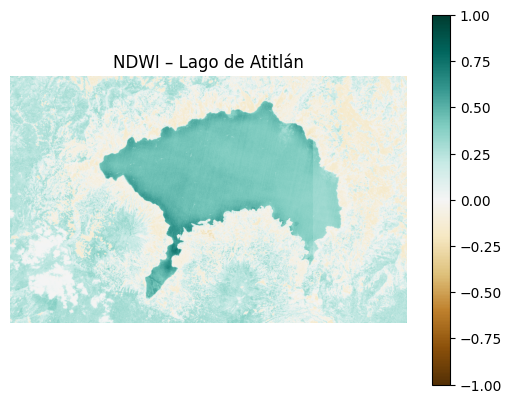

In [67]:
plt.imshow(ndwi_atitlan, cmap='BrBG', vmin=-1, vmax=1)
plt.title("NDWI – Lago de Atitlán")
plt.colorbar()
plt.axis('off')
plt.show()

| NDWI        | Interpretación                       |
| ----------- | ------------------------------------ |
| **> 0.2**   | Agua o zonas húmedas                 |
| **0 a 0.2** | Vegetación poco densa o suelo húmedo |
| **< 0**     | Vegetación o suelo seco              |


## Ejercicios:

1. Muestre el mapa en true color del lago de Amatitlan.  
2. Calcule los índices NDVI y NDWI para el lago de amatitlán y muestre los mapas.  
3. Discuta semejanzas y diferencias sobre los índices en ambos lagos